# Least Square Regression for Nonlinear Functions

## importing necessary libraries

In [50]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

print(x)
print(y)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[0.14956706 0.1304717  0.16290567 0.16484801 0.21271397 0.17118933
 0.14162474 0.21244559 0.17783433 0.16441415 0.19578954 0.15196559
 0.21719373 0.23570443 0.15397729 0.22383064 0.17621749 0.26037895
 0.26852528 0.22775044 0.25601319 0.26055837 0.23845115 0.21241712
 0.22246422 0.2607899  0.22072011 0.25136903 0.3280834  0.28239217
 0.30401525 0.34356093 0.26380619 0.29895079 0.33006353 0.31482388
 0.37395803 0.32470245 0.34331825 0.33838208 0.37980599 0.35552723
 0.3583176  0.453

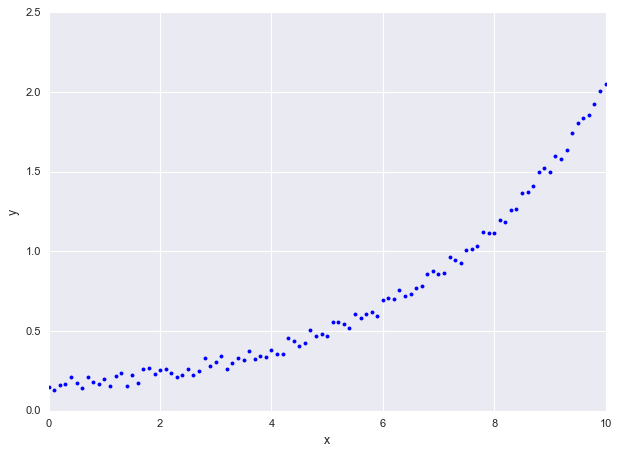

In [51]:
# Let's have a look of the data
plt.figure(figsize = (8,6))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
# fitting the data
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.1367827317409922, beta=0.2649945139059686


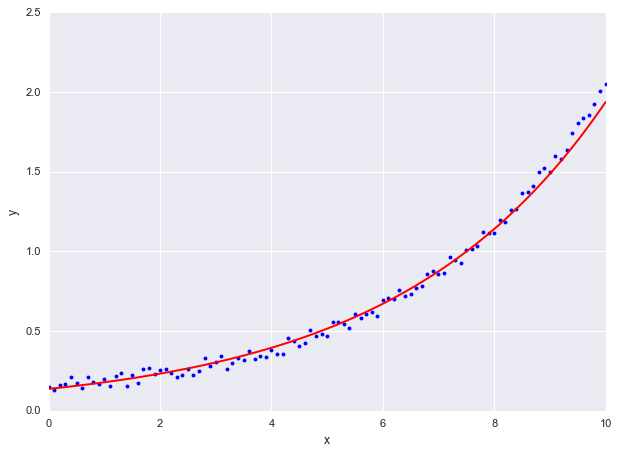

In [53]:
# Let's have a look of the data
plt.figure(figsize = (8,6))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Log tricks for power functions

The power function case is very similar. Assume we have a function in the form $\hat{y}(x)=bx^m$ and data for $x$ and $y$. Then we can turn this function into a linear form by taking log to both sides: $log(\hat{y}(x)) = m \log (x) + \log b$. Therefore, we can solve this function as a linear regression.

## Polynomial Regression

We can also use polynomial and least squares to fit a nonlinear function. Previously, we have our functions all in linear form, that is, $y=ax + b$. But polynomials are functions with the following form:

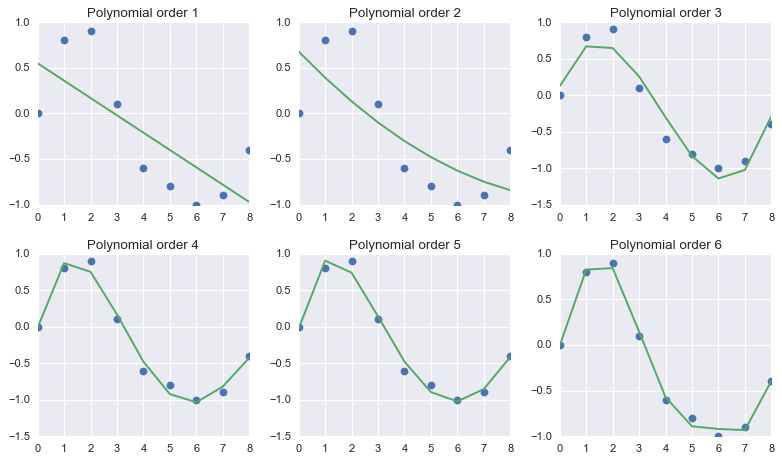

In [55]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (10, 6))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

The figure above shows that we can use different order of polynomials to fit the same data. The higher the order, the curve we used to fit the data will be more flexible to fit the data. 

## Use `optimize.curve_fit` from `scipy`

In [56]:
# let's define the function form
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=0.12479196105013467, beta=0.2787885171270869


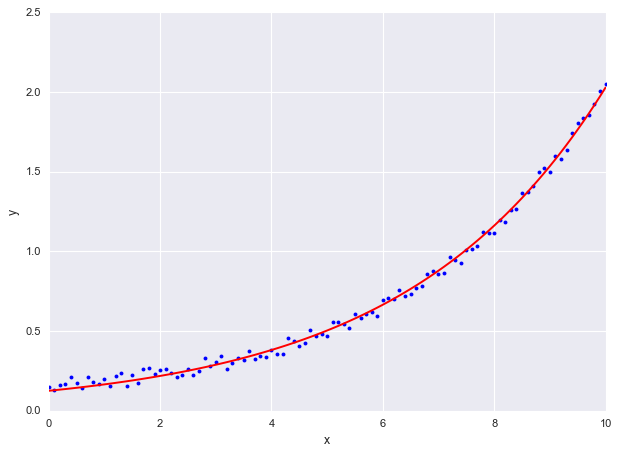

In [58]:
# Let's have a look of the data
plt.figure(figsize = (8,6))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()